## 國際原油價格：西德州石油價格與杜拜石油價格之迴歸分析¶

* 想看的問題：西德州石油價格與杜拜石油價格的相關性？
* 接下來做迴歸分析後，拿training data到testing data中預測結果好嗎？此regression的解釋力？

In [64]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib as mpl
mpl.rc('font', family='Noto Sans CJK TC')

### Load data
國際原油價格(2000年-2019年）<br/>
資料來源：https://data.gov.tw/dataset/6029
* 單位：西德州(美元/桶)、杜拜(美元/桶)



In [52]:
df = pd.read_csv('https://www2.moeaboe.gov.tw/oil102/oil1022010/NDC/GlobalOilOpenData.csv')

#### rename col
因為原本的資料有( )，需要重新改名字。

In [90]:
df.rename(columns={ df.columns[1]: "WTI" }, inplace=True)
df.rename(columns={ df.columns[2]: "Dubai" }, inplace=True)

#### Original shape of the dataframe


In [54]:
df.shape

(4944, 4)

In [55]:
df.head()

,日期,WTI,Dubai,布蘭特(美元/桶)
0,2019/3/29,60.14,68.39,68.38
1,2019/3/28,59.24,67.30,66.99
2,2019/3/27,59.34,67.12,67.10
3,2019/3/26,59.82,67.35,67.55
4,2019/3/25,58.66,67.19,67.66


In [56]:
df.dtypes

日期            object
WTI          float64
Dubai        float64
布蘭特(美元/桶)    float64
dtype: object

#### 看一下相關係數

In [94]:
df.WTI.corr(df.Dubai)

0.9790341913744751

可以發現兩種石油價格相關性非常高<br/>
是否同時說好要一同變高價格？

### Reshape 西德州石油價格跟杜拜石油價格
切記要用reshape讓迴歸獨得到資料。

In [95]:
X=df.WTI.values
Y=df.Dubai.values
XX=X.reshape(len(X),1)
YY=Y.reshape(len(Y),1)

#### Split data for 80% train and 20% test samples

In [75]:
x_train,x_test,y_train,y_test = train_test_split(XX,YY,test_size = 0.2,random_state = 100)

### traing data

Text(0.5,1,'西德州石油價格和杜拜石油價格的關係-training')

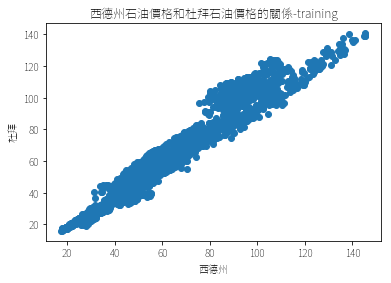

In [77]:
plt.scatter(x_train, y_train)
plt.xlabel('西德州')
plt.ylabel('杜拜')
plt.title('西德州石油價格和杜拜石油價格的關係-training data')

其實蠻明顯可以看到近乎是一條直線，除了價格在80美元-120美元的部分杜拜石油價格有兩種可能。

Text(0.5,1,'西德州石油價格和杜拜石油價格的關係-testing')

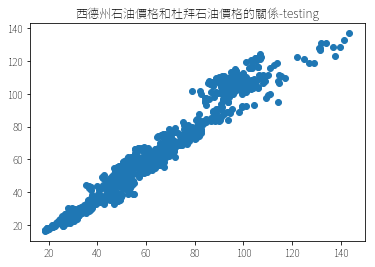

In [79]:
plt.scatter(x_test, y_test)
plt.title('西德州石油價格和杜拜石油價格的關係-testing data')

#### Fit a logistic regression

In [96]:
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### 把testing data帶入regression中

In [97]:
Y_pred = regr.predict(x_test)

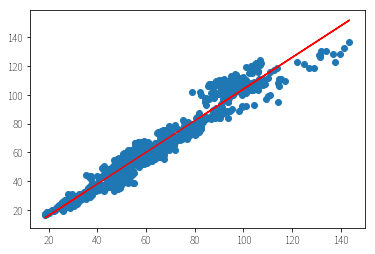

In [98]:
plt.scatter(x_test, y_test)
plt.plot(x_test, Y_pred, 'r')

## R-squared
看看模型的解釋力

In [99]:
regr.score(x_test,y_test) 

0.9591747626161634

## summary

* 可以推斷用迴歸分析模型R^2算是蠻高的，有96%
* 想把線性迴歸的估計值寫出來，這樣可以拿來預測杜拜石油的價格。

## Fuhtermore：
我會想看看另一種（布蘭特）石油是否也跟杜拜or西德州符合線性迴歸，然後準確率是多少？